        Entity Code  Year  \
0  Afghanistan  AFG  1990   
1  Afghanistan  AFG  1991   
2  Afghanistan  AFG  1992   
3  Afghanistan  AFG  1993   
4  Afghanistan  AFG  1994   

   GDP per capita, PPP (constant 2011 international $)  \
0                                                NaN     
1                                                NaN     
2                                                NaN     
3                                                NaN     
4                                                NaN     

   Per capita consumption-based CO2 emissions  Per capita CO2 emissions  
0                                         NaN                  0.209736  
1                                         NaN                  0.182522  
2                                         NaN                  0.095227  
3                                         NaN                  0.084280  
4                                         NaN                  0.075053  
    Entity  Year            Inde

/Users/mirbek/miniconda3/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 18 rows containing missing values.
/Users/mirbek/miniconda3/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:98: PlotnineWarning: geom_path: Removed 2 rows containing missing values.


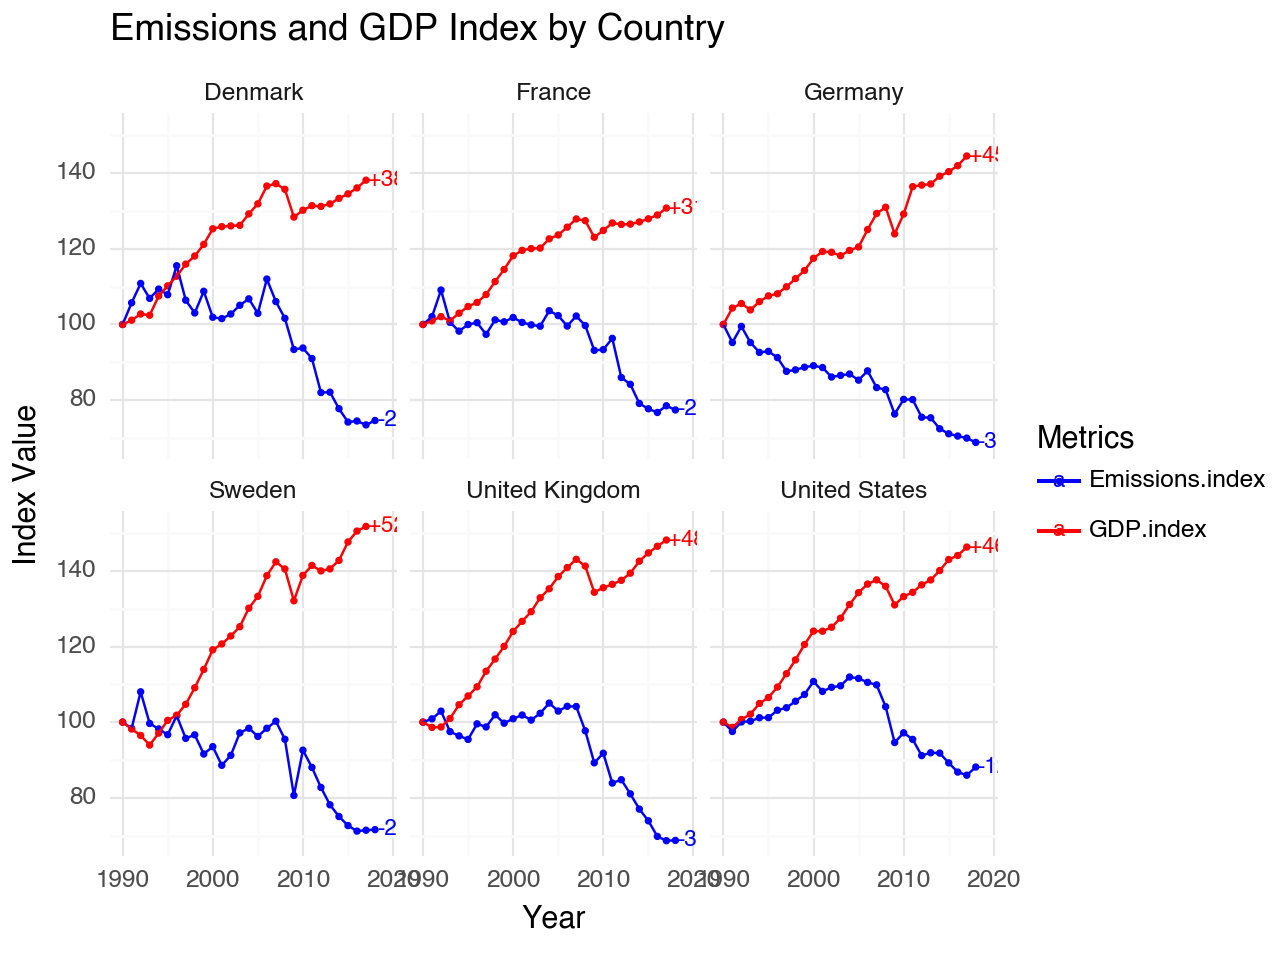

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import *
from PIL import Image
import os

# Reading the data
gdpco2 = pd.read_csv("co2-emissions-and-gdp.csv")

print(gdpco2.head())

countries = ["Sweden", "United Kingdom", "France", "United States", "Germany", "Denmark"]

gdpco2_six = gdpco2[gdpco2['Entity'].isin(countries)]

# Corrected the column name to drop
gdpco2_six = gdpco2_six.drop(columns=['Per capita CO2 emissions'])

# Renamed columns
gdpco2_six = gdpco2_six.rename(columns={
    'Per capita consumption-based CO2 emissions': 'Emissions',
    'GDP per capita, PPP (constant 2011 international $)': 'GDP'
})

# Filtered data for the year 1990
gdpco2_90 = gdpco2_six[gdpco2_six['Year'] == 1990]

gdpco2_90 = gdpco2_90[['Entity', 'Emissions', 'GDP']]
gdpco2_90.columns = ['Entity', 'Emissions.90', 'GDP.90']

gdpco2_six_index = pd.merge(gdpco2_six, gdpco2_90, on="Entity", how="left")
gdpco2_six_index['Emissions.index'] = gdpco2_six_index['Emissions'] / gdpco2_six_index['Emissions.90'] * 100
gdpco2_six_index['GDP.index'] = gdpco2_six_index['GDP'] / gdpco2_six_index['GDP.90'] * 100

# Reshaping using pandas
gdpco2_plot = gdpco2_six_index.melt(id_vars=['Entity', 'Year'], value_vars=['Emissions.index', 'GDP.index'], var_name='Index', value_name='Value')
print(gdpco2_plot.head())

# Data labels
condition = ((gdpco2_plot['Year'] == 2017) & (gdpco2_plot['Index'] == "GDP.index")) | ((gdpco2_plot['Year'] == 2018) & (gdpco2_plot['Index'] == "Emissions.index"))
datalabels = gdpco2_plot[condition].copy()

datalabels['Label'] = datalabels['Value'].apply(lambda x: f"{round(x-100)}%" if x-100 < 0 else f"+{round(x-100)}%")
print(datalabels.head())

# Plotting.

(ggplot(gdpco2_plot, aes(x='Year', y='Value', color='Index'))
 + geom_point(size=0.5)
 + geom_line()
 + theme_minimal()
 + facet_wrap('~Entity', ncol=3))
# Plot
p = (ggplot(gdpco2_plot, aes(x='Year', y='Value', color='Index', group='Index'))
     + geom_point(size=0.5)
     + geom_line()
     + geom_text(data=datalabels, mapping=aes(label='Label'), ha='left', nudge_x=0.2, size=8)
     + scale_color_manual(values={"Emissions.index": "blue", "GDP.index": "red"})
     + theme_minimal()
     + facet_wrap('~Entity', ncol=3)
     + labs(title="Emissions and GDP Index by Country",
            x="Year",
            y="Index Value",
            color="Metrics")
     + theme(legend_title_align='left'))

# Display the plot
print(p)

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


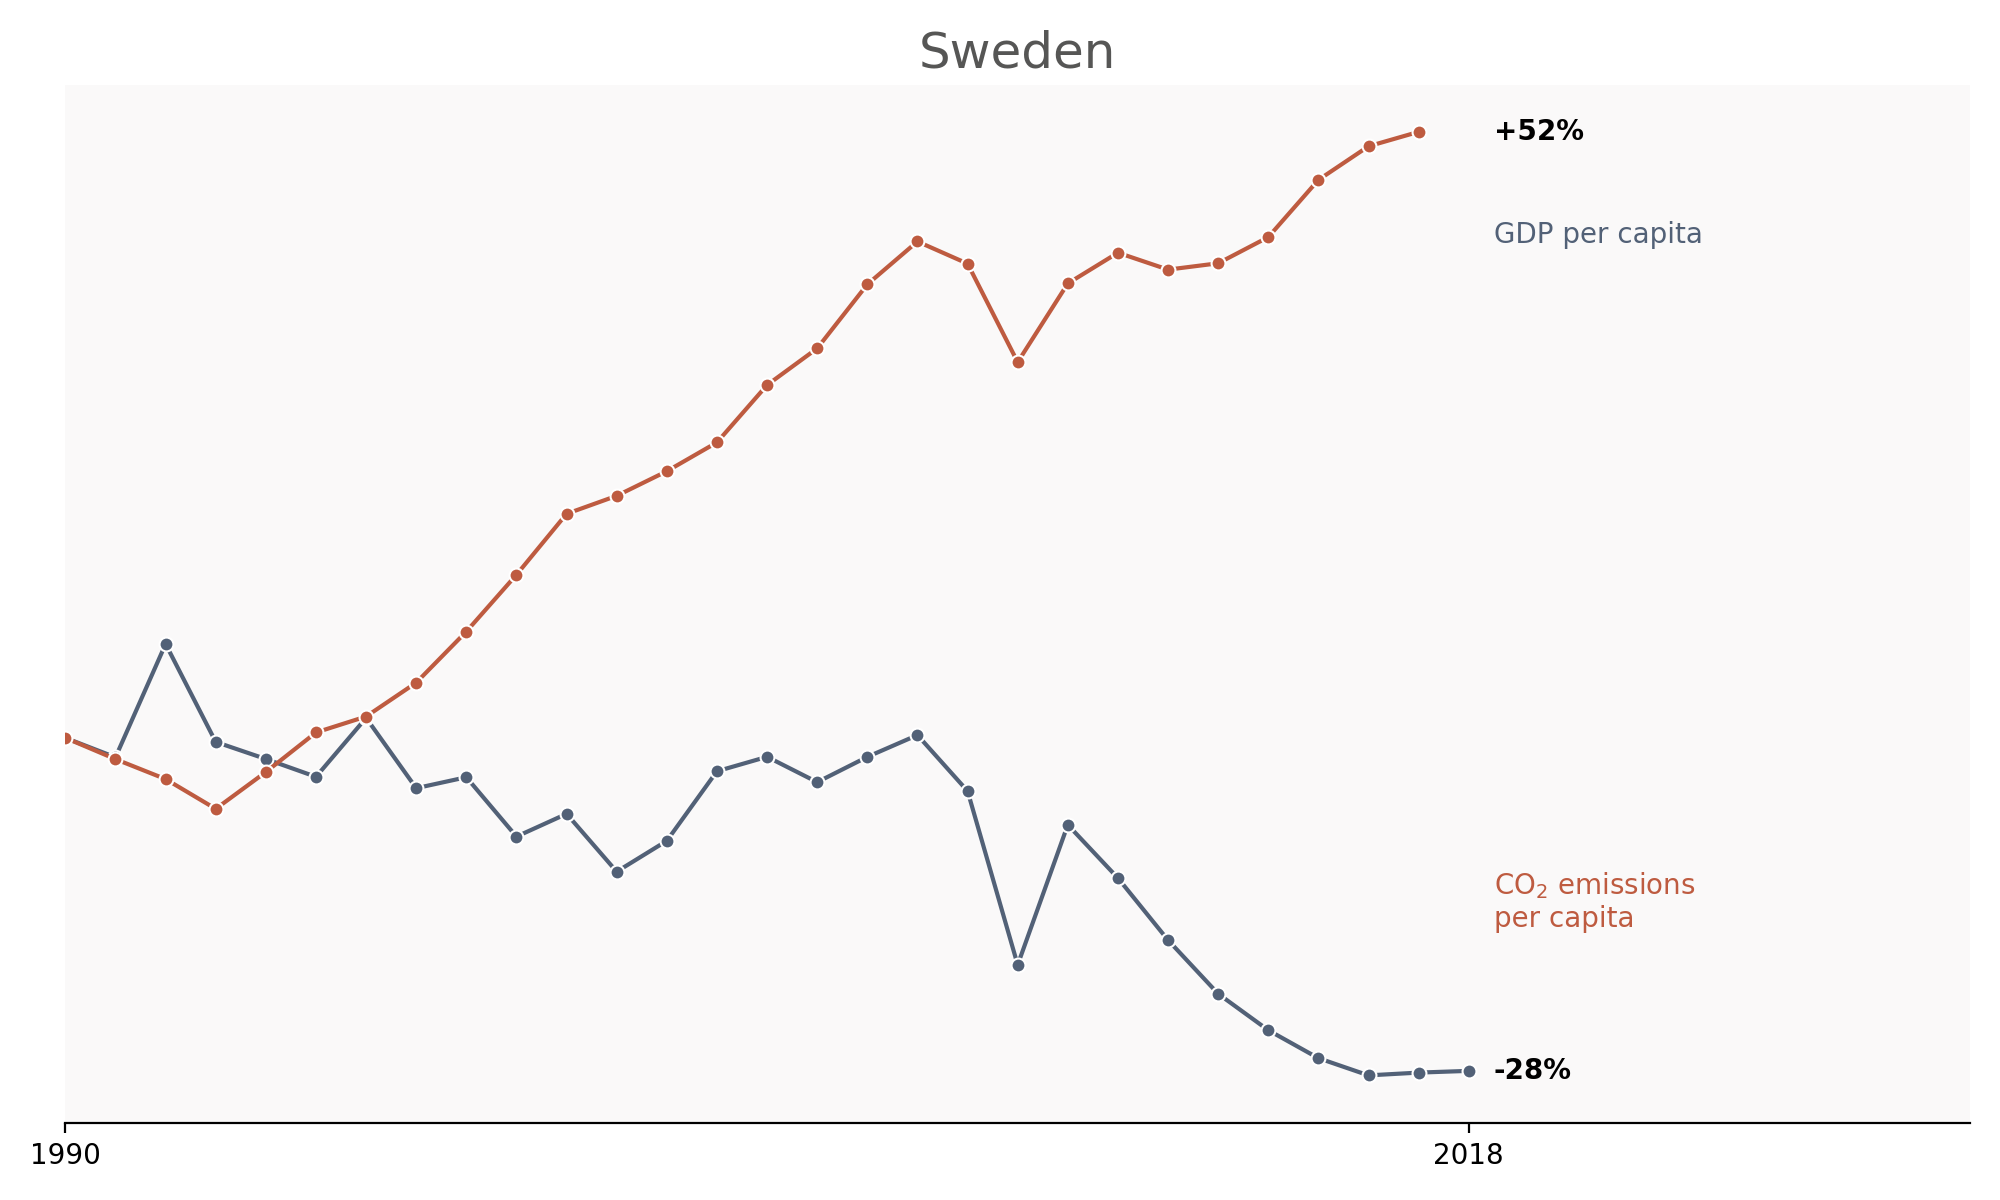

In [2]:
# Filtering data for Sweden
gdpco2_sweden = gdpco2_plot[gdpco2_plot['Entity'] == "Sweden"]

# Define a color map based on 'Index'
color_map = {"GDP.index": "#BE5B40", "Emissions.index": "#526177"}

# Filtering the data for the specific labels
datalabels = gdpco2_plot[((gdpco2_plot['Year'] == 2017) & (gdpco2_plot['Index'] == "GDP.index")) |
                         ((gdpco2_plot['Year'] == 2018) & (gdpco2_plot['Index'] == "Emissions.index"))].copy()

# Creating the label
datalabels['Label'] = datalabels['Value'].apply(lambda x: f"+{round(x - 100)}%" if x - 100 >= 0 else f"{round(x - 100)}%")

# Plotting
plt.figure(figsize=(10,6))
sns.lineplot(data=gdpco2_sweden, x='Year', y='Value', hue='Index', marker="o", markersize=5, palette=color_map)

# Add data labels for Sweden
for _, row in datalabels[datalabels['Entity'] == "Sweden"].iterrows():
    plt.text(x=2018.5, y=row['Value'], s=row['Label'], fontweight='bold', va="center")

# Annotations
plt.annotate("GDP per capita", (2018.5, 143), color="#526177", va="center", ha="left")
plt.annotate("CO$_2$ emissions\nper capita", (2018.5, 86), color="#BE5B40", va="center", ha="left")  

# Customizations
plt.title("Sweden", fontfamily="Playfair Display", size=18, color="#565655")
plt.xlabel(None)  # Removing the x-axis label
plt.ylabel(None)  # Removing the y-axis label
plt.xticks([1990, 2018])  # Setting x-ticks
plt.xlim(1990, 2028)  # Updating x limits
plt.yticks([])  # Removing y-ticks
plt.legend().set_visible(False)  # Hide legend
sns.despine(left=True)  # Removing left spine for minimal theme
plt.grid(False)  # Removing grid
plt.gca().set_facecolor("#FAF9F9")  # Setting plot background color
plt.gca().get_figure().patch.set_edgecolor("#CCCCCC")  # Setting border color
plt.tight_layout()
plt.show()

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


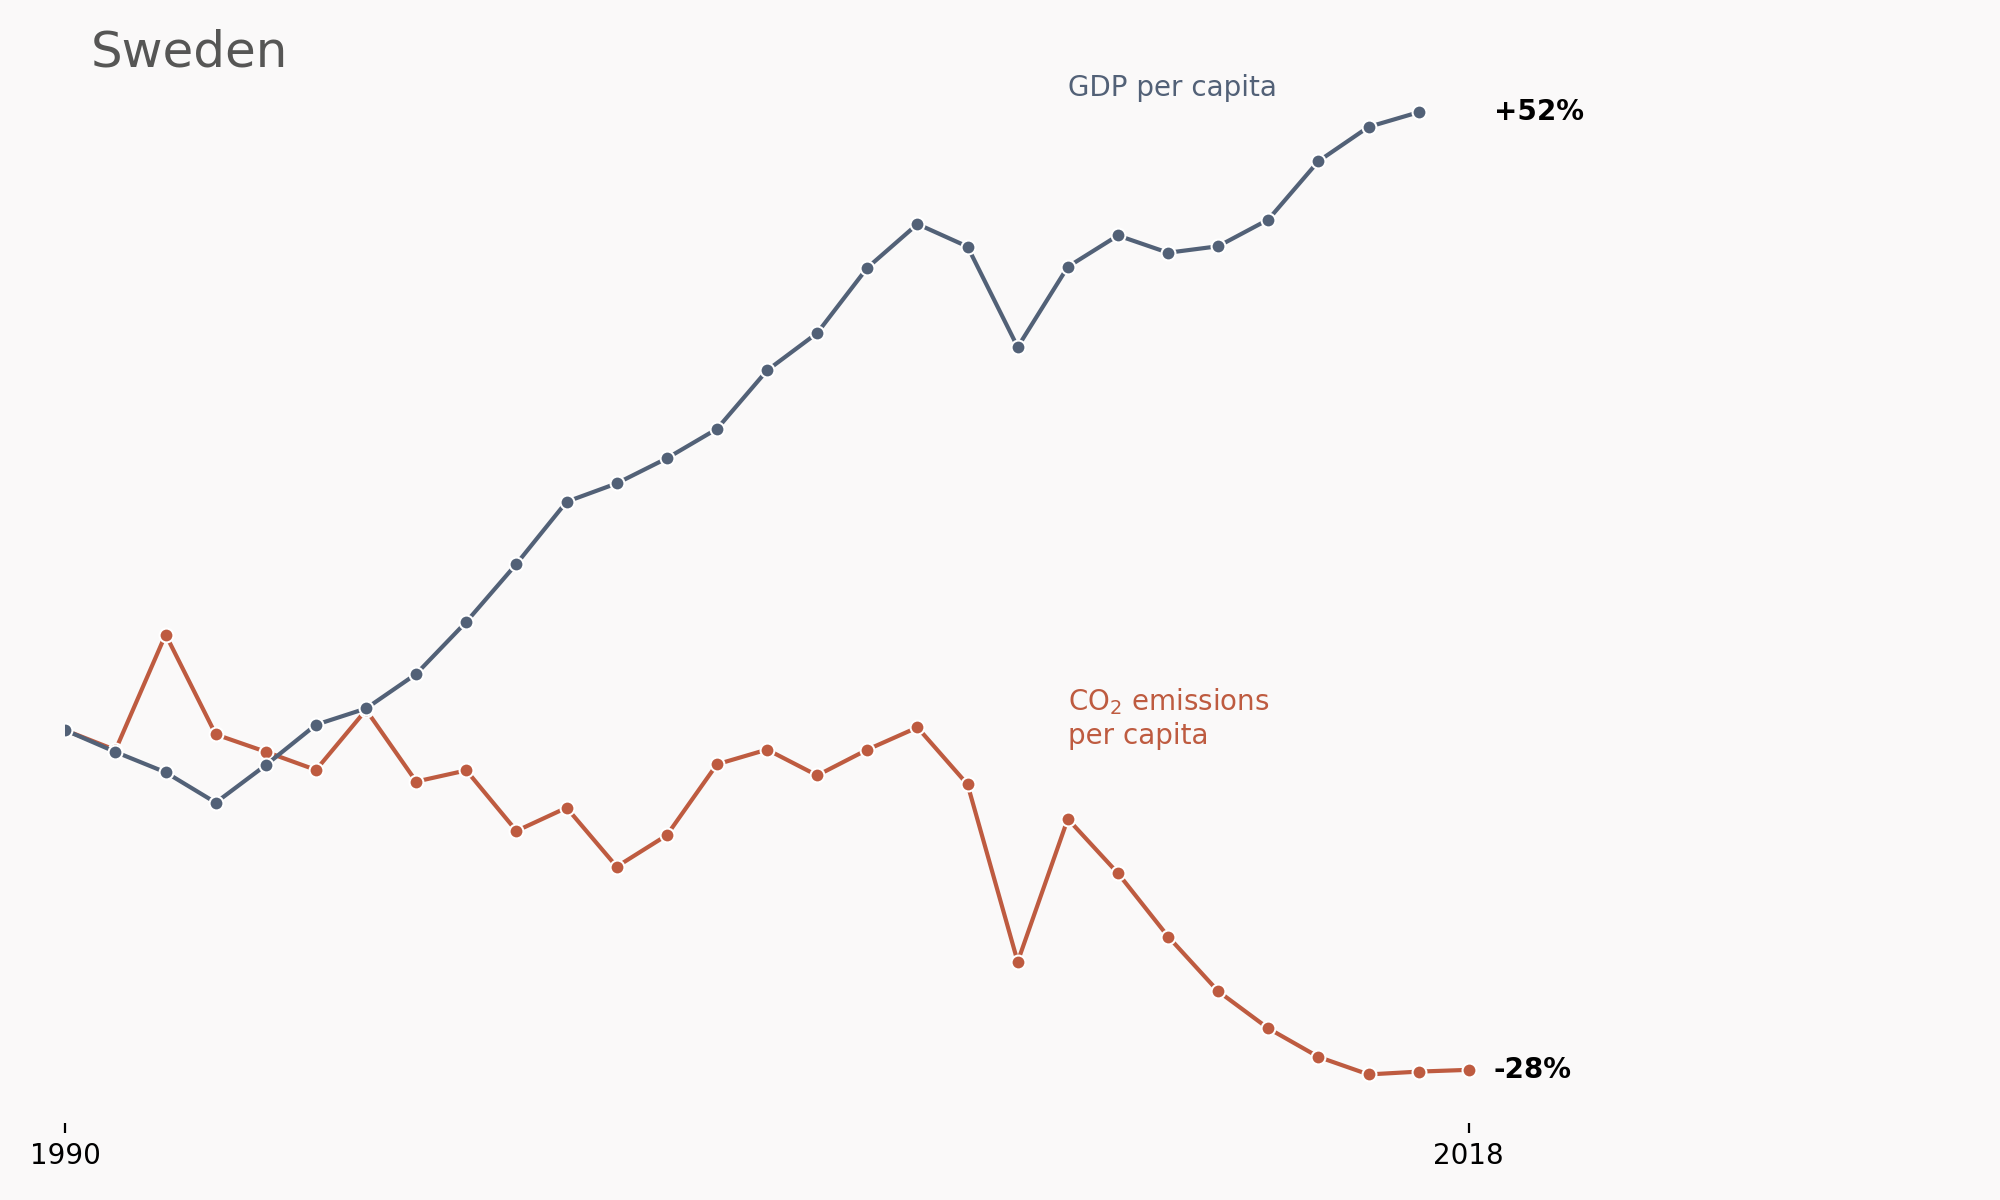

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


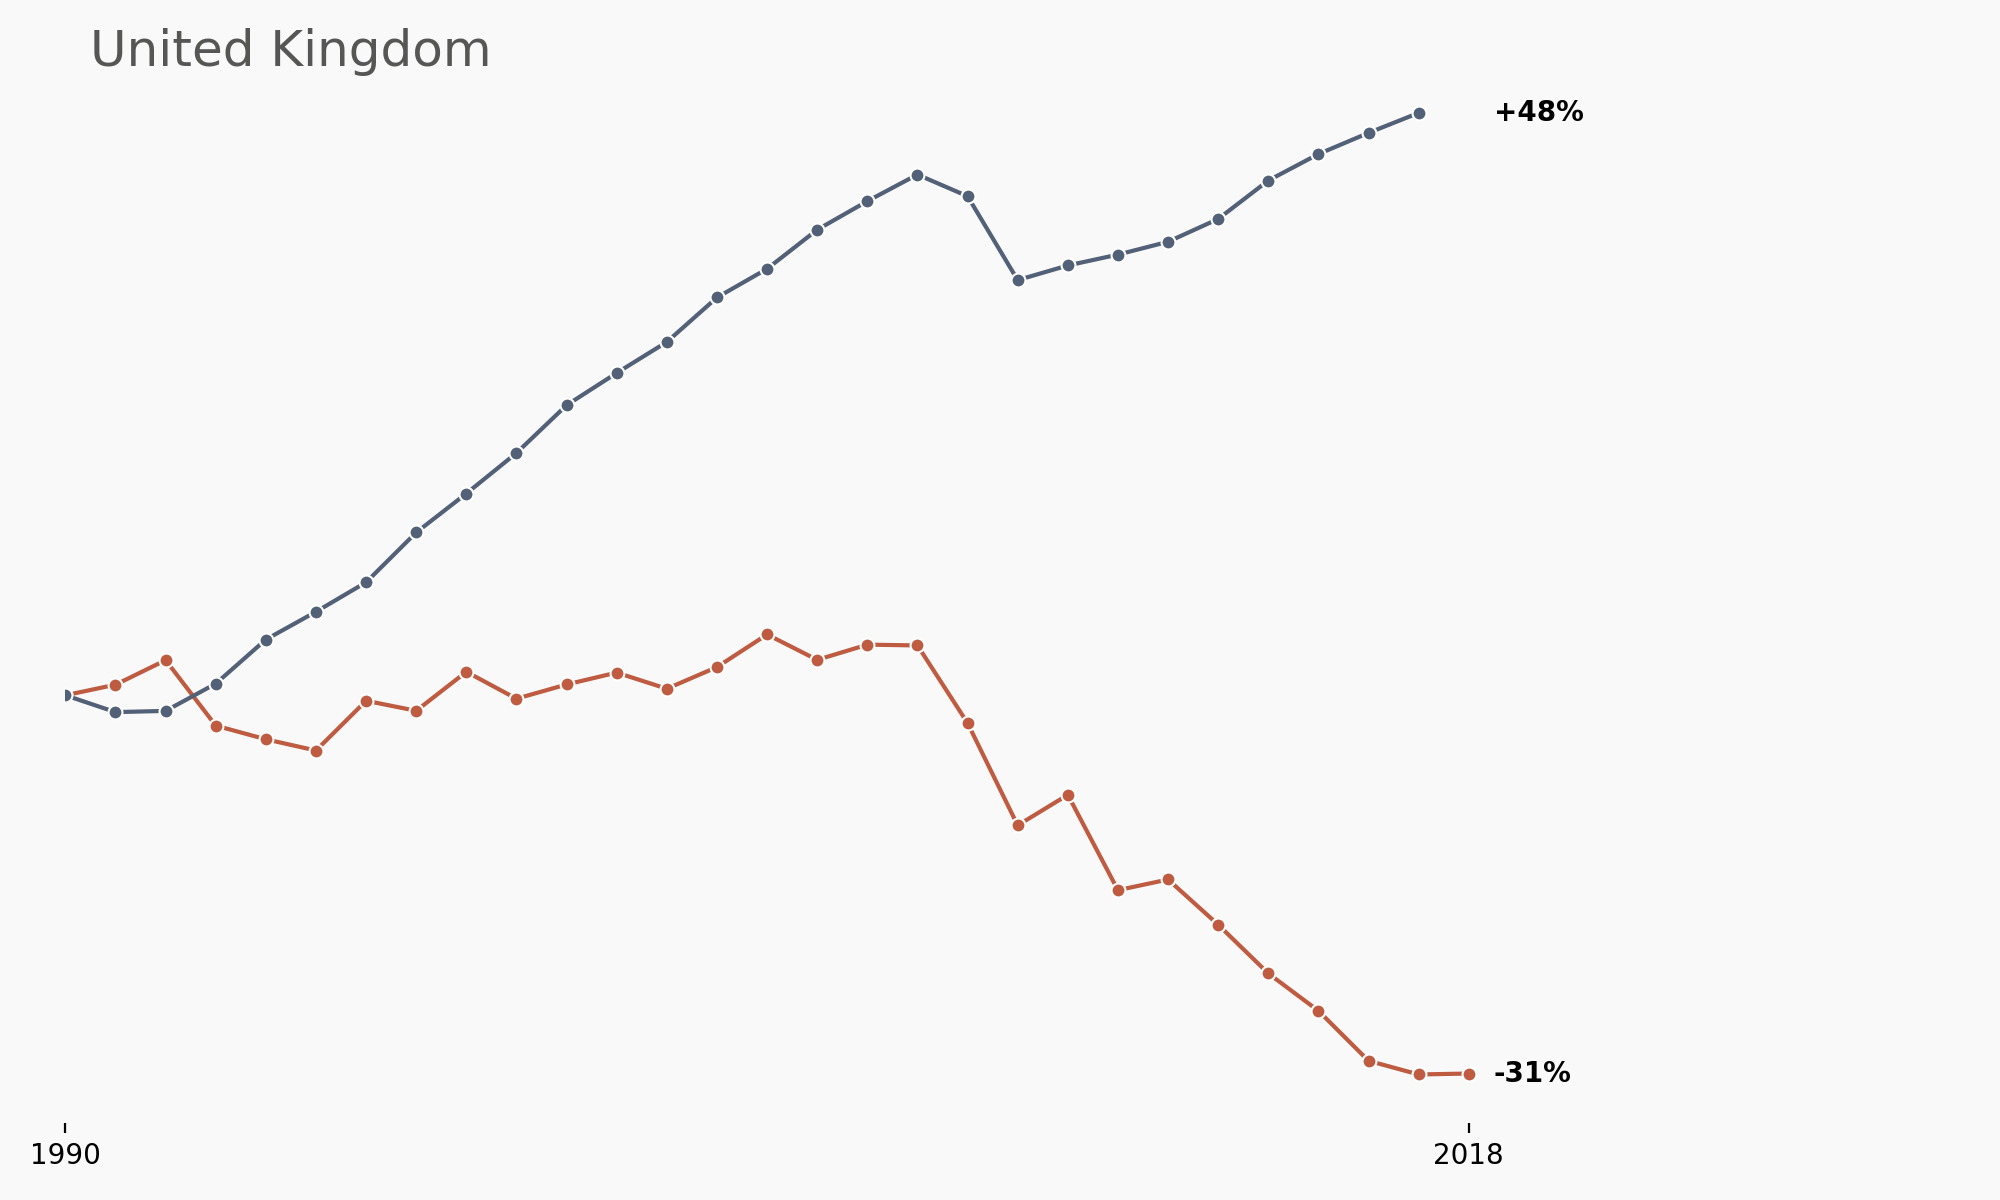

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


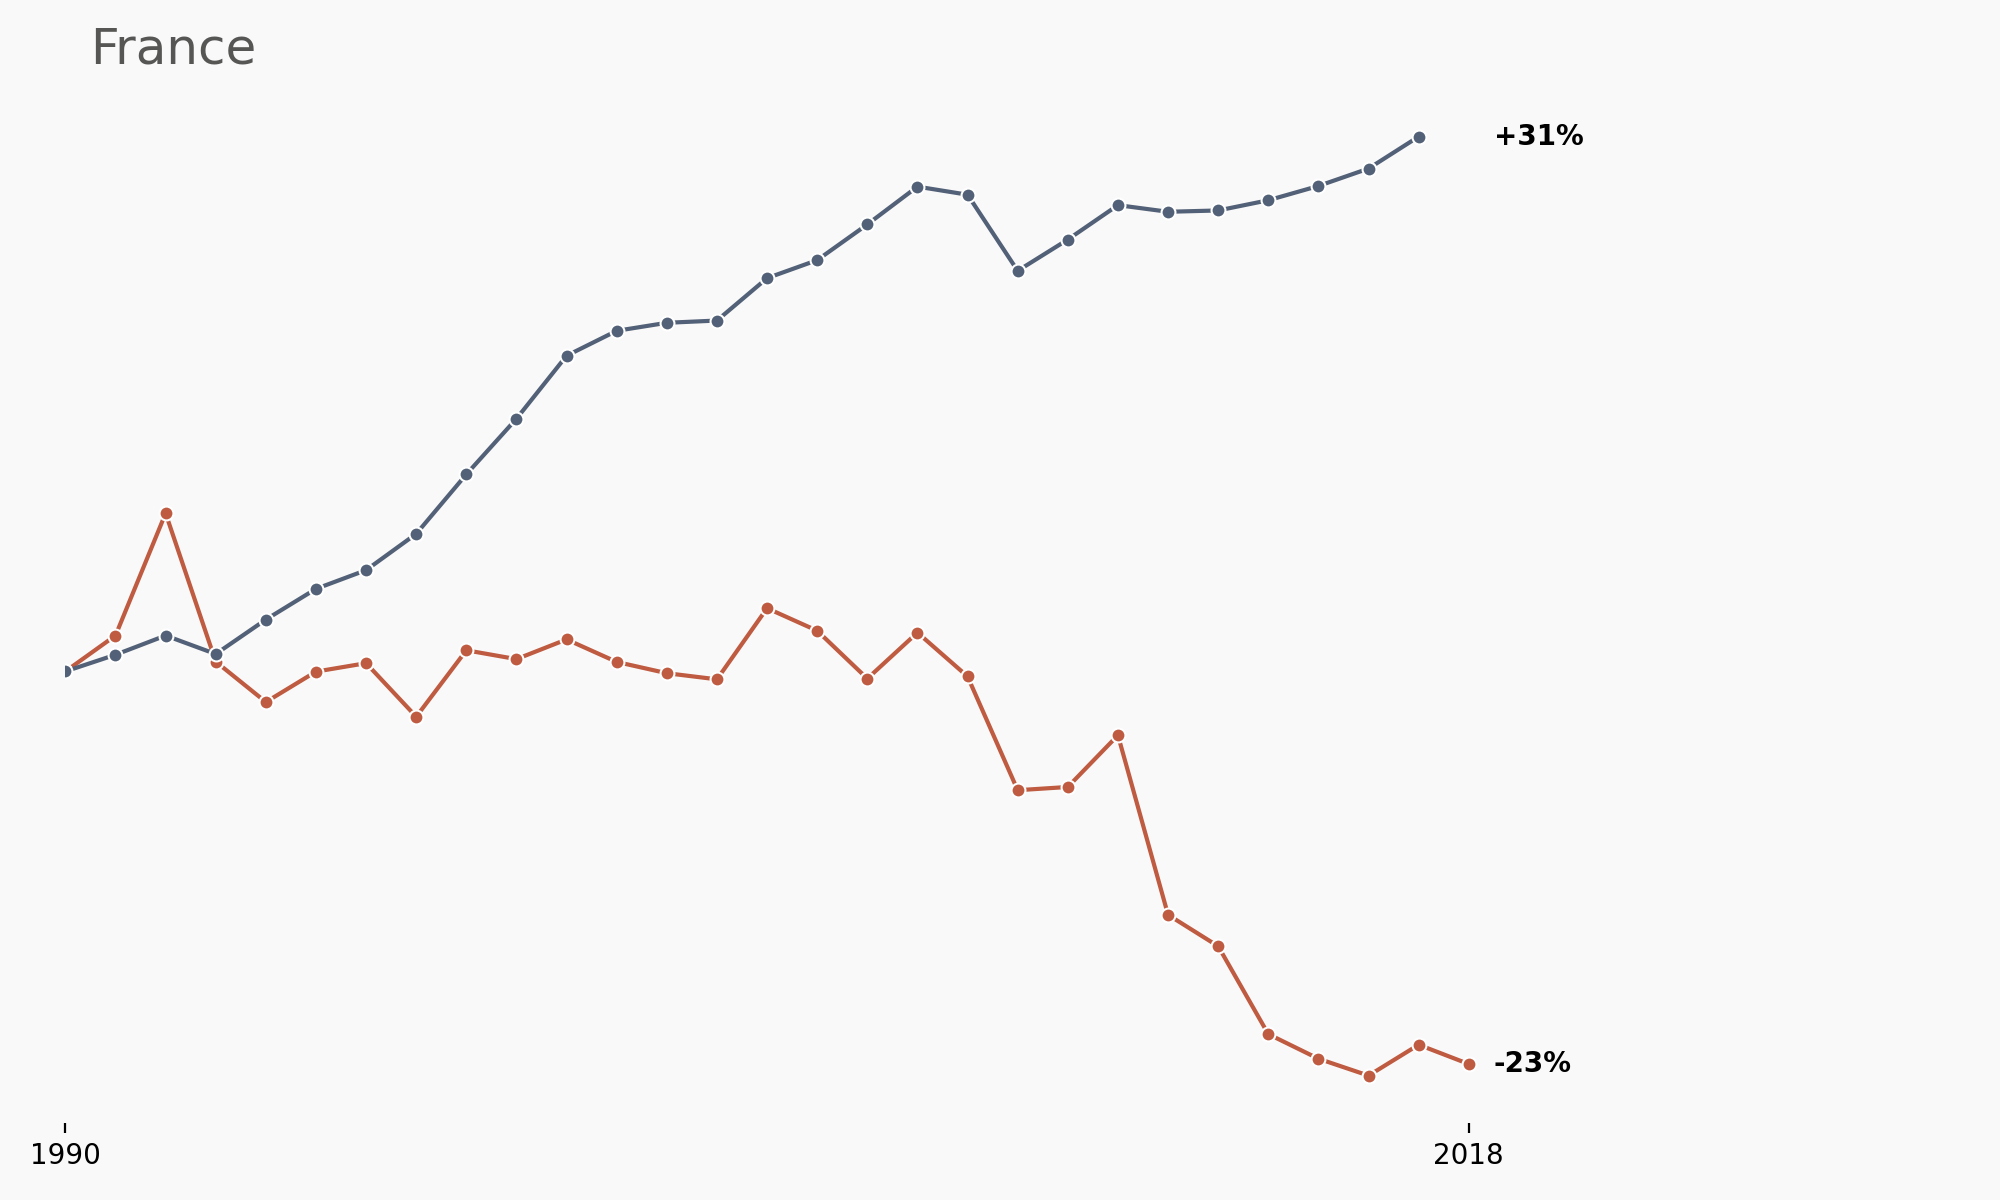

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


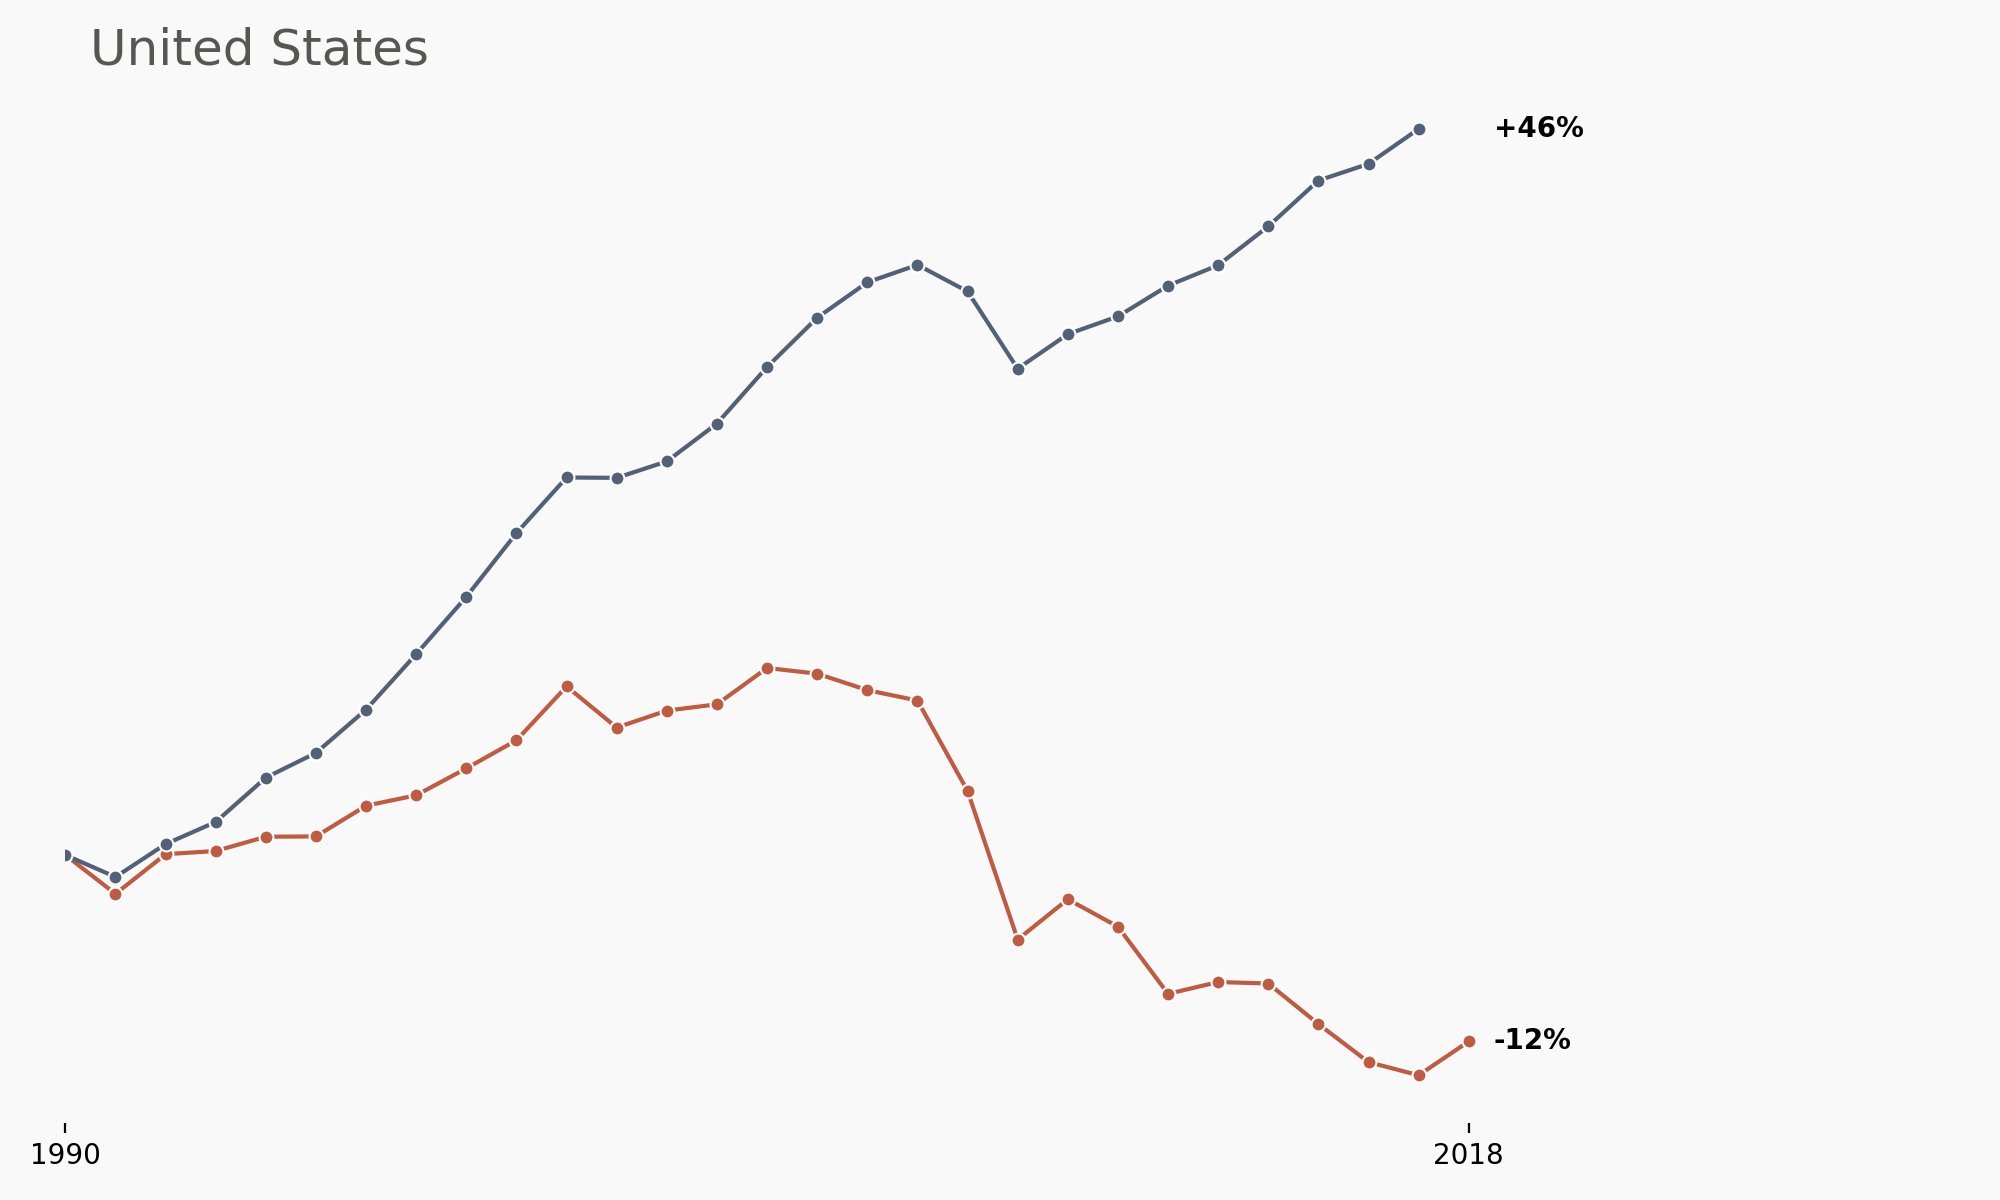

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


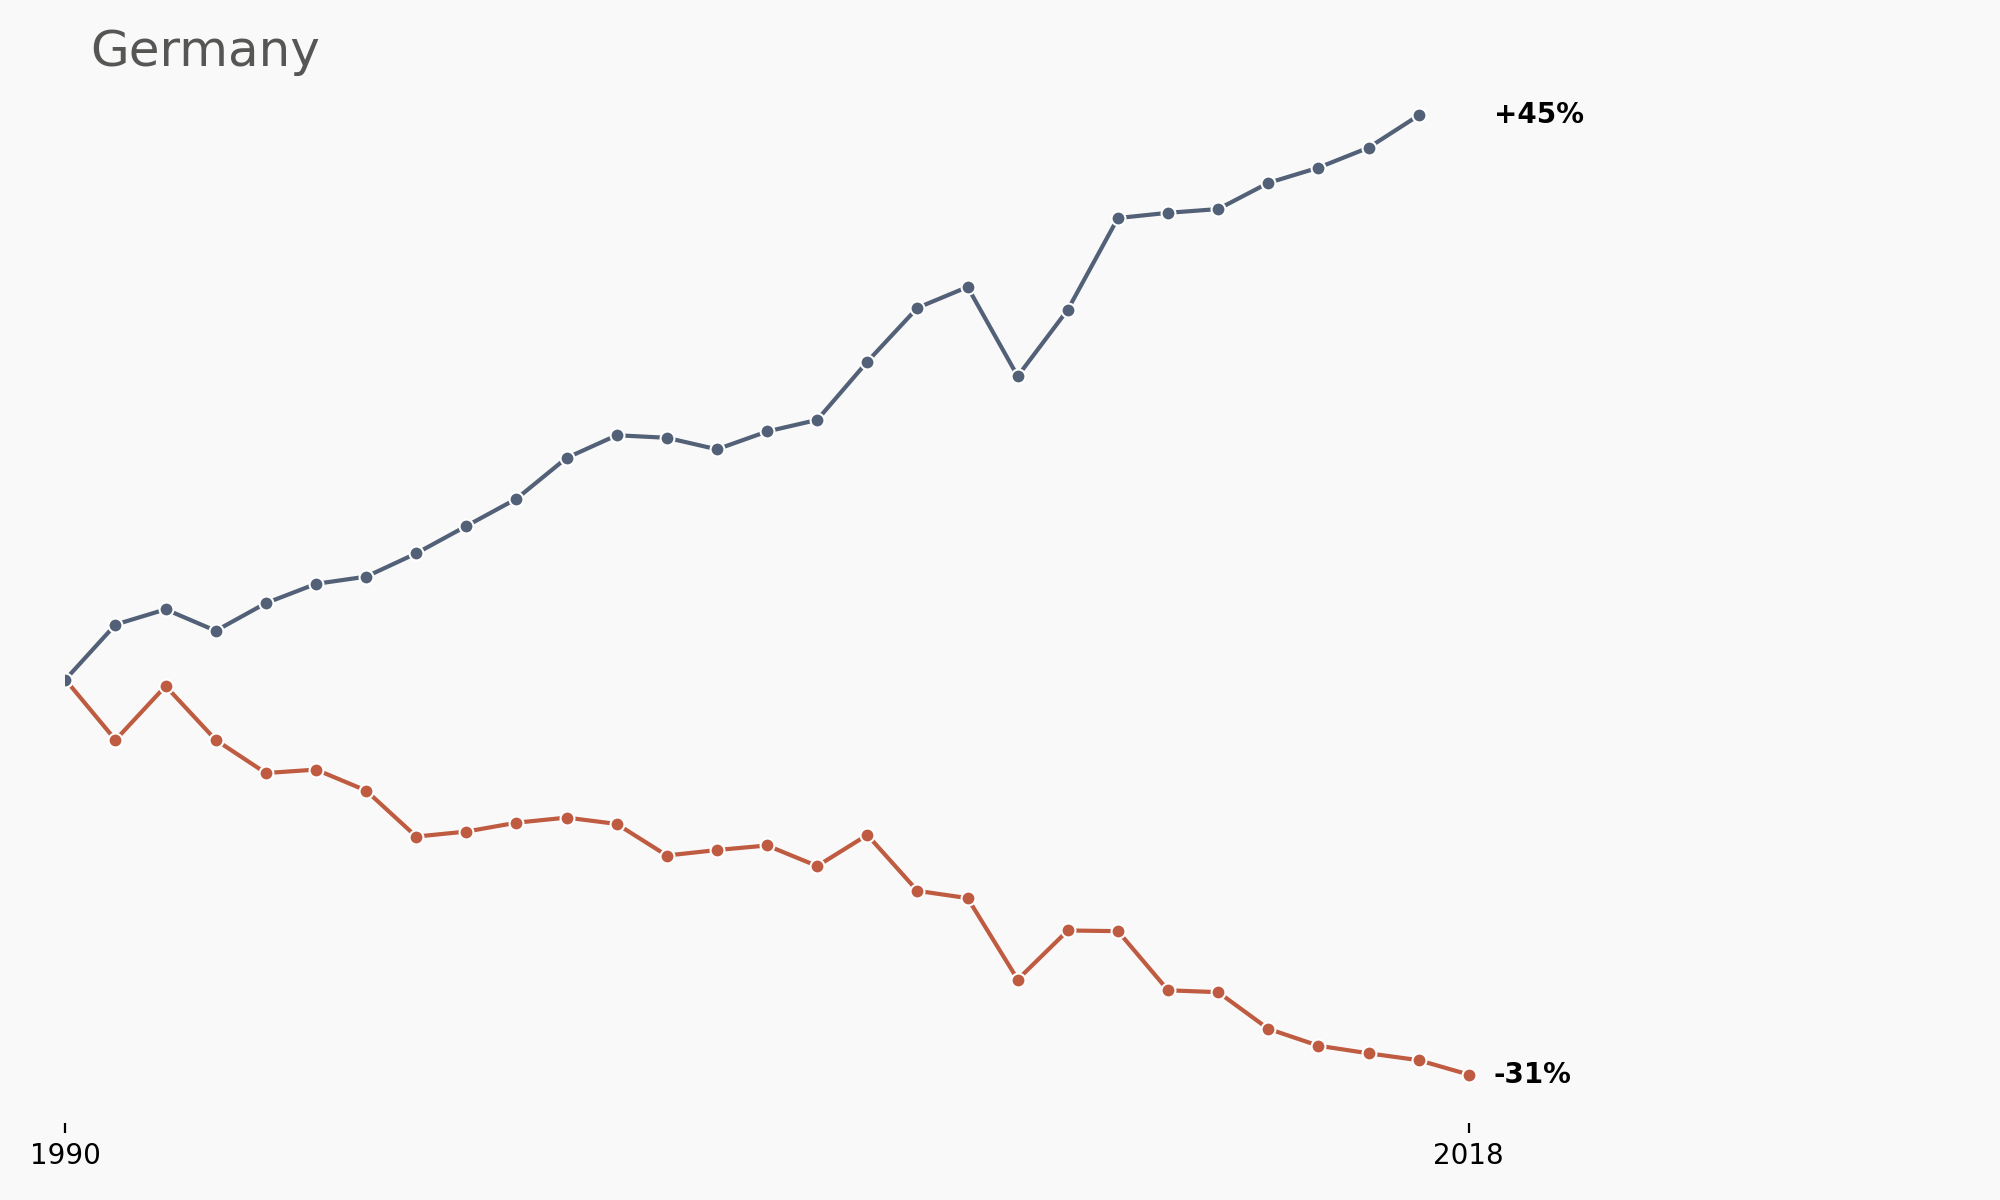

findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.
findfont: Font family 'Playfair Display' not found.


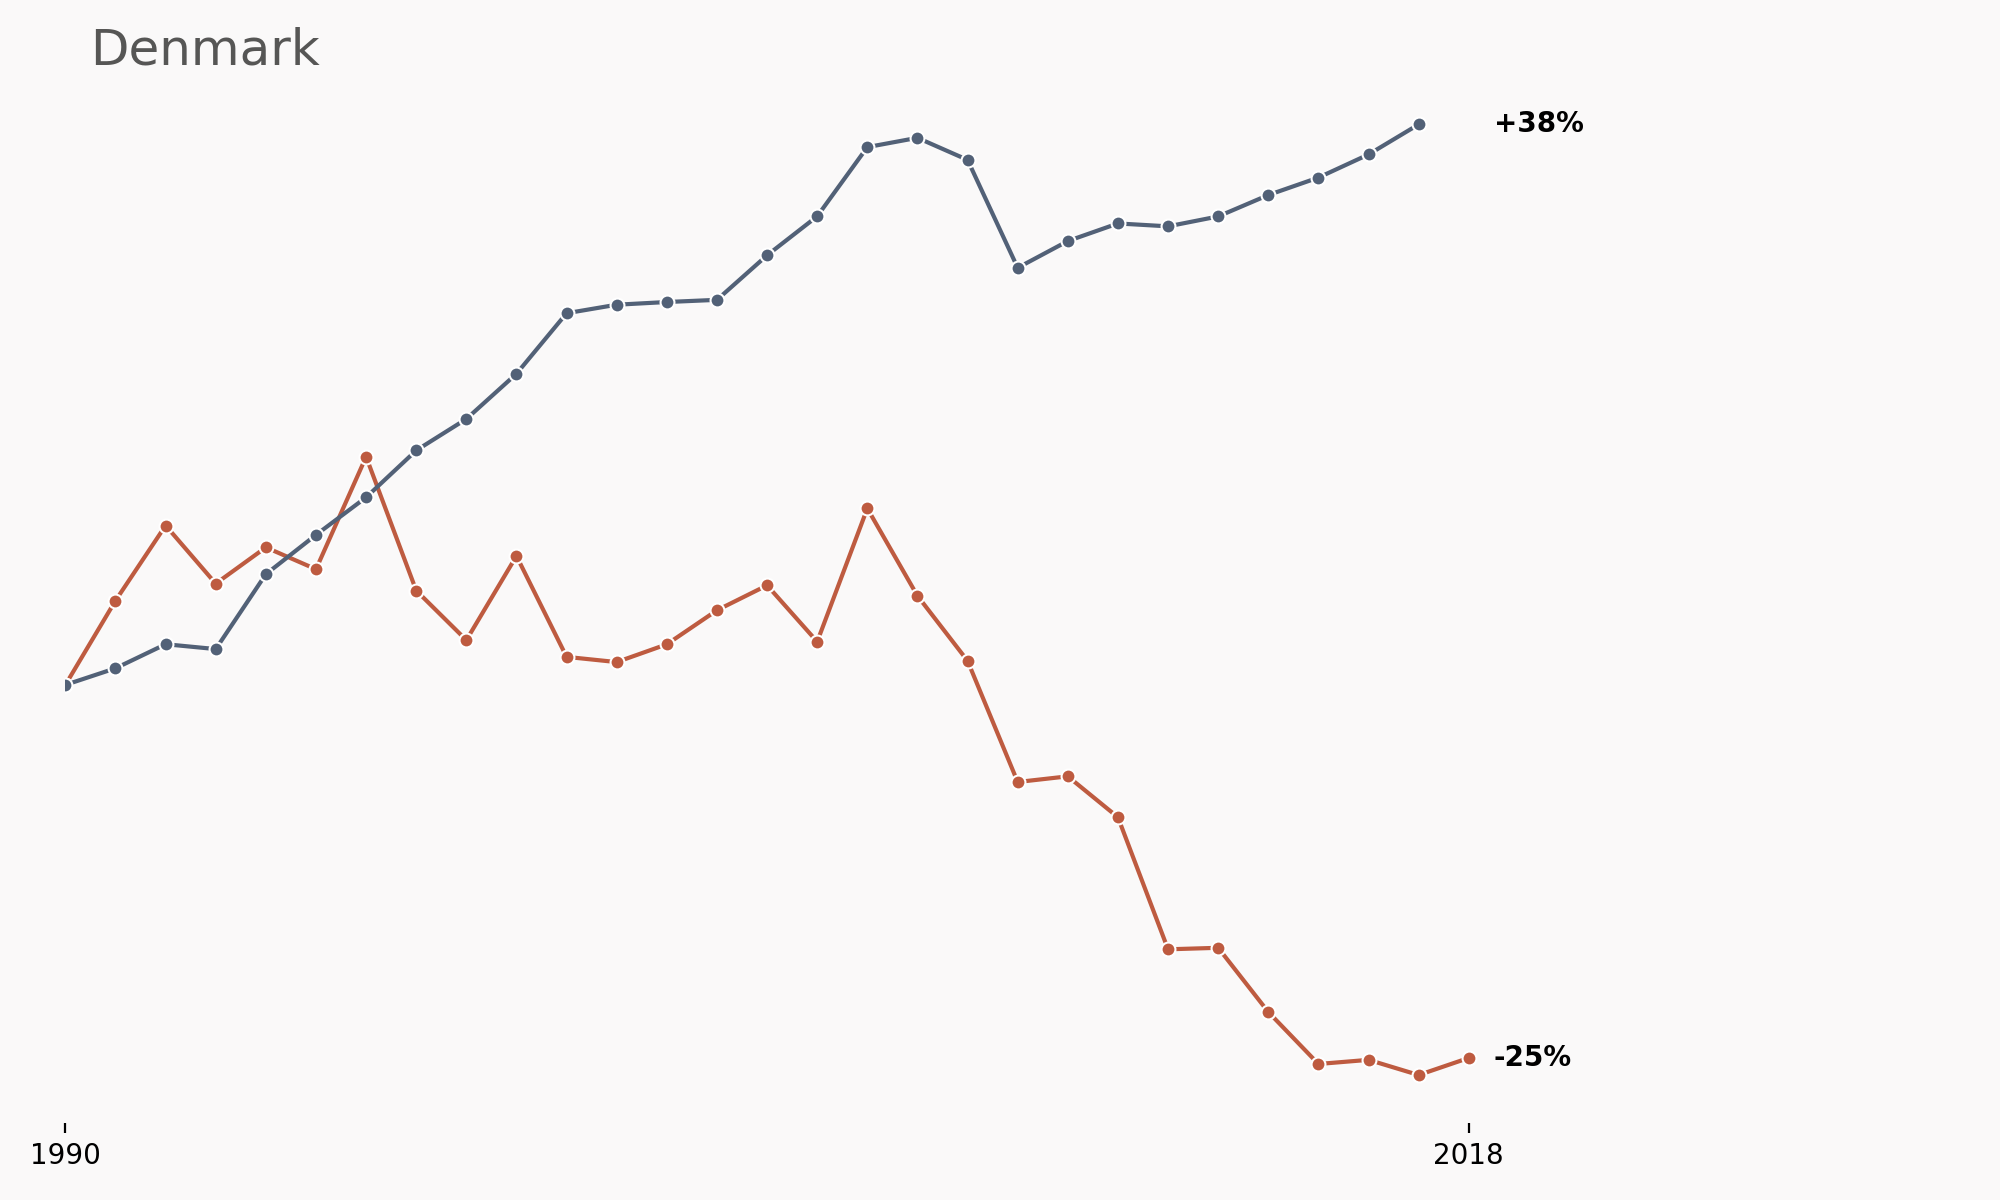

In [3]:
def plot_country_data(country, save_name, gdpco2_df, datalabels_df):
    # Filtering data for the specified country
    gdpco2_country = gdpco2_df[gdpco2_df['Entity'] == country]

    # Plotting
    # Set up the figure with the desired facecolor
    plt.figure(figsize=(10,6), facecolor="#FAF9F9")
    sns.lineplot(data=gdpco2_country, x='Year', y='Value', hue='Index', marker="o", markersize=5, palette=color_map)

    # Add data labels
    for _, row in datalabels_df[datalabels_df['Entity'] == country].iterrows():
        plt.text(x=2018.5, y=row['Value'], s=row['Label'], fontweight='bold', va="center")

    # Annotations
    if country == "Sweden":  # We will apply annotations only for the first plot
        plt.annotate("GDP per capita", (2010, gdpco2_country[gdpco2_country['Index'] == 'GDP.index']['Value'].max() + 2), 
                 color="#526177", va="center", ha="left")

        plt.annotate("CO$_2$ emissions\nper capita", (2010, gdpco2_country[gdpco2_country['Index'] == 'Emissions.index']['Value'].max() - 7), 
                 color="#BE5B40", va="center", ha="left")

    # Customizations
    # Positioning the country name on the top left part
    plt.text(1990.5, gdpco2_country['Value'].max() + 5, country, fontfamily="Playfair Display", size=18, color="#565655", va="center", ha="left")
    plt.xlabel(None)
    plt.ylabel(None)
    plt.xticks([1990, 2018])
    plt.xlim(1990, 2028)
    plt.yticks([])
    plt.legend().set_visible(False)
    sns.despine(left=True)
    plt.grid(False)
    plt.gca().set_facecolor("#FAF9F9")
    plt.gca().get_figure().patch.set_edgecolor("#CCCCCC")
    ax = plt.gca()
    ax.spines['bottom'].set_visible(False)
    plt.tight_layout()
    
    # Save and display the plot
    plt.savefig(save_name + '.png', dpi=300)
    plt.show()
    plt.close()

# Color map with swapped colors
color_map = {"GDP.index": "#526177", "Emissions.index": "#BE5B40"}

# List of countries and corresponding save names
countries = ["Sweden", "United Kingdom", "France", "United States", "Germany", "Denmark"]
save_names = ["sweden", "uk", "france", "us", "germany", "denmark"]

# Generating plots
for country, save_name in zip(countries, save_names):
    plot_country_data(country, save_name, gdpco2_plot, datalabels)
